In [2]:
import numpy as np
import scipy as sp
import math
#get prepared for spaghetti an Italian grandmother would be proud of

#finds spectrogram, yes I spelled it wrong
def specto(data,window,overlap):#data to find the spectrogram of, window used, overlap
    nwindow=window.shape[0]#length of window
    nframes=math.floor(1.0+1/(1.0-overlap)*(len(data)/nwindow-1.0))#number of frames
    sgram=np.zeros((nwindow,nframes))#initialize
    hop=math.floor((1.0-overlap)*nwindow)#hop size
    for i in range(nframes):
        datawin=data[i*hop:(i)*hop+nwindow]#data in frame
        sgram[:,i]=np.abs(np.fft.fft(window*datawin))#spectrogram in frame
    return(sgram)#spectrogram

In [8]:
#does pca
def pca(X,k):#data to do pca on, number of dimensions held
    X=np.subtract( X,np.mean(X,0))#make 0 mean
    covx=np.dot(X,np.transpose(X))/(X.shape[1]-1)#find cov(X)
    evals,U=np.linalg.eig(covx)#find eigenvalues
    #plt.plot(np.log(evals))
    sqrtevals=np.diag(np.power(evals+.000000001,-.5))#inverse square root of eigenvalyes along diaginol
    W=np.dot(sqrtevals[0:k,0:k],np.transpose(U[:,0:k]))#multiply with eigenvectors and drop all but k dimensions to get features
    return(np.real(W))#features

In [3]:
A=np.loadtxt("/home/alan/Desktop/testout.txt", delimiter=",").T
B=np.loadtxt("/home/alan/Desktop/testout2.txt", delimiter=",").T

In [57]:
import matplotlib.pyplot as plt

31

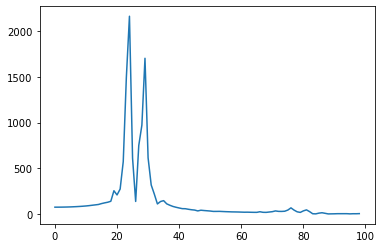

In [79]:
import matplotlib.pyplot as plt
#plt.plot(A[:,0])
plt.plot(np.abs(np.fft.fft(A[100,1:]))[0:99])
np.argmax(np.abs(np.fft.fft(A[600,1:]))[:99])

In [36]:
np.sum(np.sign(np.multiply(A[9,1:998],A[9,2:999]))==-1)

89

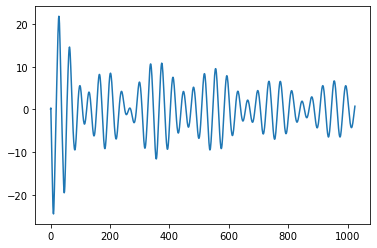

In [84]:
plt.plot(A[299,:])

957

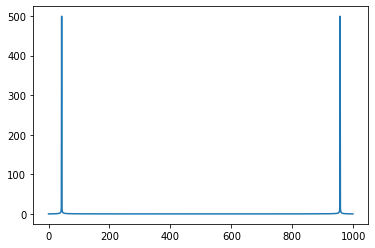

In [52]:
t = np.arange(1000)/1000
sp = np.abs(np.fft.fft(np.sin(270*t)))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(sp)
np.argmax(sp)

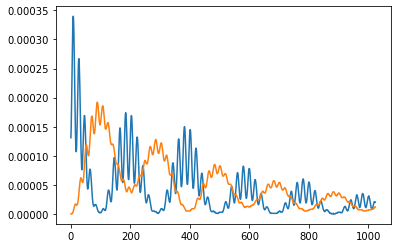

In [75]:
plt.plot(A[0,:])
plt.plot(A[1,:])

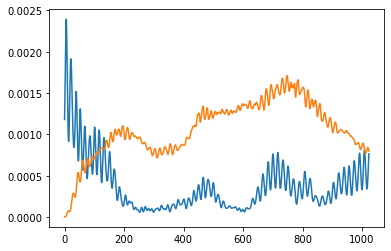

In [77]:
plt.plot(A[0,:])
plt.plot(A[1,:])

In [141]:
np.shape(train)

(1024, 100)

In [158]:
W=pca(train,20)


In [159]:
W.shape

(20, 1024)

In [160]:
classes[0].shape

(1024, 40)

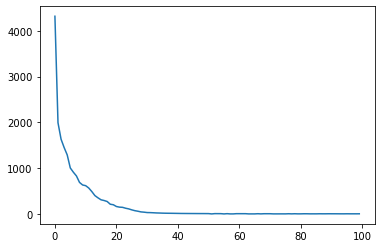

In [114]:
X=train
X=np.subtract( X,np.mean(X,0))#make 0 mean
covx=np.dot(X,np.transpose(X))/(X.shape[1]-1)#find cov(X)
evals,U=np.linalg.eig(covx)
plt.plot(evals)

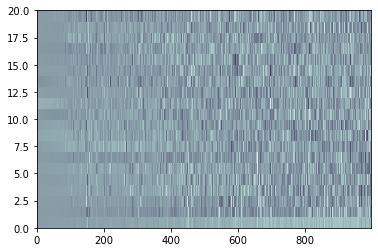

In [115]:
plt.pcolormesh(np.dot(W,train), cmap="bone")

In [74]:
from numpy.linalg import inv
from numpy.linalg import det
def problemall2(trainlist,classlist,testlist,priors,k):#training set, classified data, test data, priors, number of dimensions
    mus=[]#averages
    covinvs=[]#inverse covariance matrices
    classes=[]#classes
    covdets=[]#determinants of covariance matrices
    A=[]#coefficients in g equation
    B=[]
    C=[]
    W=pca(trainlist,k)#do pca
    for i in range(len(classlist)):
        itrain=classlist[i]
        WD=np.matmul(W,itrain)#reduce dimension
        covinvs.append(inv(np.matmul(WD,np.transpose(WD))/(WD.shape[1]-1)))#inverse covariance matrix
        covdets.append(1/det(covinvs[i]))#determinant
        mus.append(np.mean(WD,axis=1))#average
        A.append(-0.5*covinvs[i])#find coefficients
        B.append(np.matmul(mus[i].T,covinvs[i]))
        C.append(-0.5*np.matmul(B[i],mus[i])-0.5*np.log(np.asarray(covdets[i]))+np.log(priors[i]))
    for i in range(len(testlist)):#for each piece of test data
        testdata=np.matmul(W,testlist[i])#reduce dimension
        classmax=-np.inf#to find the maximum
        classs=-1#closest class, -1 for error
        for j in range(len(classlist)):#yes, I know it's inefficient, I couldn't get the matrix form to work
            g=np.dot(testdata.T,np.matmul(A[j],testdata))+np.matmul(B[j],testdata)+C[j]#find g
            if g>classmax:#compare to old best match
                 classmax=g#update
                 classs=j#best match is now j
        classes.append(classs)
    return classes

In [214]:
classtest=problemall2(train,classtrain,test,[.4,.6],12)

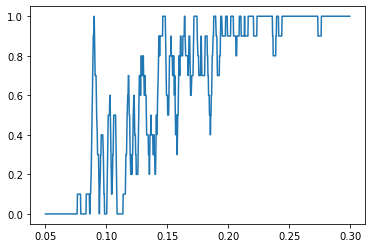

In [217]:
plt.plot(testlabels,np.convolve(classtest,np.ones(10)*.1)[:900])

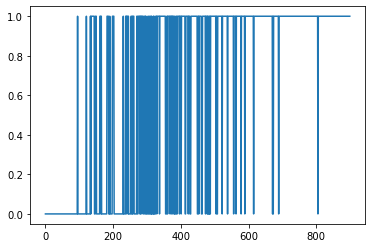

In [216]:
plt.plot(classtest)

In [215]:
sum(classtest==(np.array(testlabels)>.15))/900

0.8377777777777777

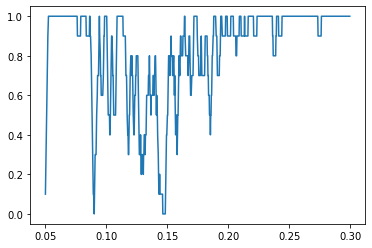

In [218]:
plt.plot(testlabels,np.convolve(classtest==(np.array(testlabels)>.15),np.ones(10)*.1)[:900])

In [240]:
classtrain=[train[:,0:20], train[:,20:60],train[:,60:]]
classtest=problemall2(train,classtrain,test,[.2,.4,.4],6)

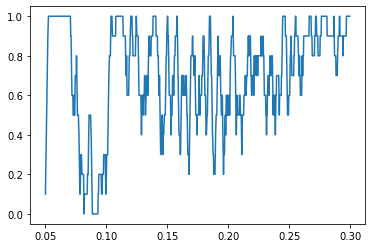

In [236]:
plt.plot(testlabels,np.convolve(classtest==((np.array(testlabels)>.10)*1+(np.array(testlabels)>.20)*1),np.ones(10)*.1)[:900])

In [241]:
sum(classtest==((np.array(testlabels)>.10)*1+(np.array(testlabels)>.20)*1))/900

0.7144444444444444

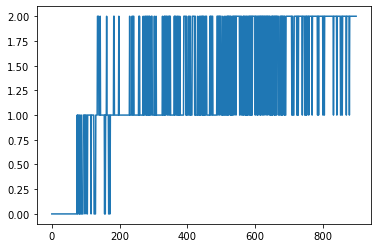

In [221]:
plt.plot(classtest)

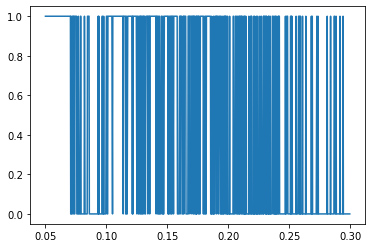

In [222]:
plt.plot(testlabels,classtest==((np.array(testlabels)>.10)+(np.array(testlabels)>.20)))

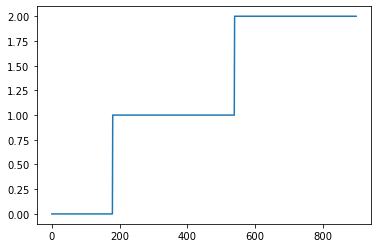

In [235]:
x=np.array(testlabels)>.10
y=np.array(testlabels)>.20
z=x*1+y*1
plt.plot(z)

In [276]:
classtrain=[train[:,0:300], train[:,300:]]
classtest=problemall2(train,classtrain,test,[.3,.7],12)

In [277]:
sum(classtest==(np.array(testlabels)>.15))/9000

0.8298888888888889

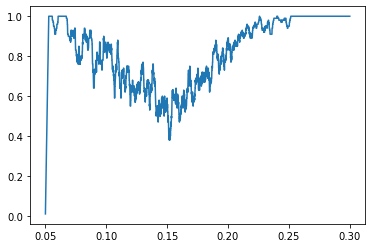

In [278]:
plt.plot(testlabels,np.convolve(classtest==(np.array(testlabels)>.15),np.ones(100)*.01)[:9000])

In [71]:
Arand=A+30*np.random.randn(1025,10000)

In [76]:
trainlabels=np.array([A[0,i] for i in range(10000) if i%10==0])
testlabels=[A[0,i] for i in range(10000) if i%10!=0]

In [25]:
train=np.array([A[1:,i] for i in range(10000) if i%10==0]).T
test=[B[1:,i] for i in range(10000) if i%10!=0]
classtrain=[train[:,0:400], train[:,400:]]

In [32]:
train=np.array([np.abs(np.fft.fft(A[1:,i])) for i in range(10000) if i%10==0]).T
test=[np.abs(np.fft.fft(A[1:,i])) for i in range(10000) if i%10!=0]
classtrain=[train[:,0:400], train[:,400:]]

In [28]:
train=np.array([np.abs(np.fft.fft(Arand[1:,i])) for i in range(10000) if i%10==0]).T
test=[np.abs(np.fft.fft(Arand[1:,i])) for i in range(10000) if i%10!=0]
classtrain=[train[:,0:400], train[:,400:]]

In [72]:
train=np.array([Arand[1:,i] for i in range(10000) if i%10==0]).T
test=[Arand[1:,i] for i in range(10000) if i%10!=0]
classtrain=[train[:,0:400], train[:,400:]]

In [77]:
classtest=problemall2(train,classtrain,test,[.4,.6],20)
sum(classtest==(np.array(testlabels)>.15))/9000

0.7802222222222223

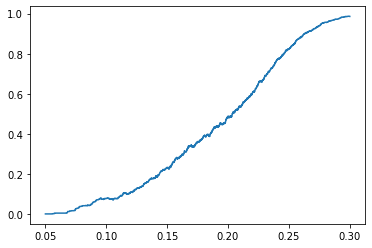

In [78]:
plt.plot(testlabels,np.convolve(classtest,np.ones(1000)*.001)[:9000])

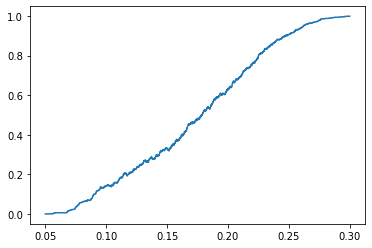

In [16]:
plt.plot(testlabels,np.convolve(classtest,np.ones(1000)*.001)[:9000])

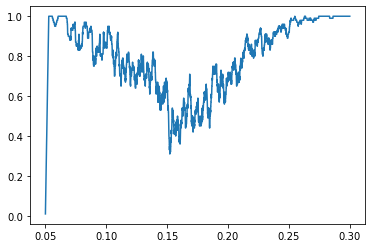

In [52]:
plt.plot(testlabels,np.convolve(classtest==(np.array(testlabels)>.15),np.ones(100)*.01)[:9000])

In [11]:
import matplotlib.pyplot as plt

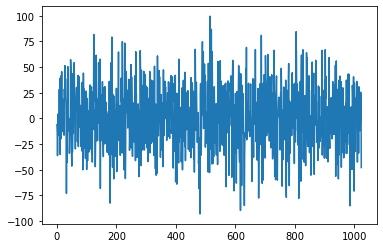

In [68]:
plt.plot(Arand[1:,0])

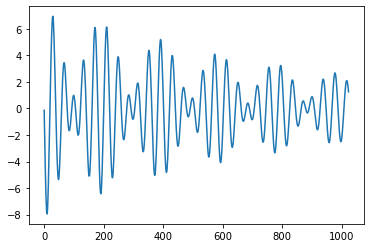

In [51]:
plt.plot(A[1:,0])

In [44]:
E25=np.loadtxt("/home/alan/Desktop/2en25.txt")
E35=np.loadtxt("/home/alan/Desktop/2en35.txt")
E20=np.loadtxt("/home/alan/Desktop/2en20.txt")
E40=np.loadtxt("/home/alan/Desktop/2en40.txt")
E30=np.loadtxt("/home/alan/Desktop/2en30.txt")

In [36]:
E25.shape

(2, 1024)

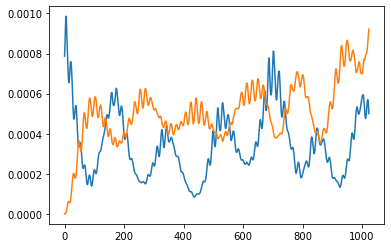

In [38]:
plt.plot(E25[0,:])
plt.plot(E25[1,:])

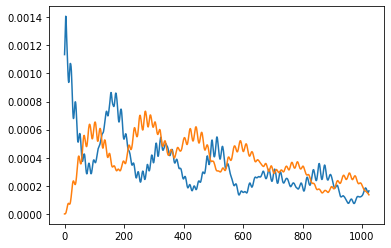

In [45]:
plt.plot(E30[0,:])
plt.plot(E30[1,:])

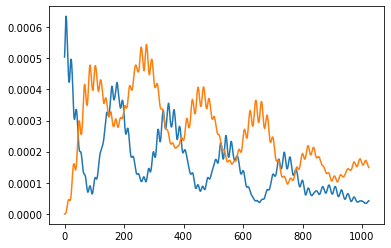

In [42]:
plt.plot(E20[0,:])
plt.plot(E20[1,:])

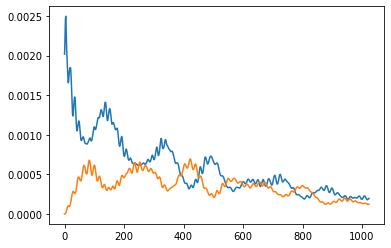

In [46]:
plt.plot(E40[0,:])
plt.plot(E40[1,:])

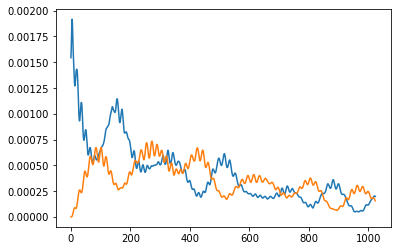

In [39]:
plt.plot(E35[0,:])
plt.plot(E35[1,:])

In [33]:
def HMM2(train,nclusters,transin,musin,covvin,priorsin):##Why did I write this? You even warned me.
    dims=train.shape[1]
    lentrain=train.shape[0]
    #Initalize everything
    alpha=np.zeros((lentrain,nclusters))
    beta=np.zeros((lentrain,nclusters))
    gamma=np.zeros((lentrain,nclusters))
    xi=np.zeros((lentrain-1,nclusters,nclusters))
    trans=transin
    oldtrans=trans
    mus=musin
    covv=covvin
    priors=priorsin
    gamma[0,:]=priors
    
    

    c=np.zeros(lentrain)
    s=np.zeros(lentrain)
    
    #print(priors)
    #print(dims)
    #print(covv)
    #print(mus)
    
    
    
    for j in range(100):
    ##############E step
        #print(det(covv[0,:,:]))
        ###FORWARD PASS
        for l in range(nclusters):
            #calculate first alpha
            alpha[0,l]=priors[l]*(6.28318530718)**(-0.5*dims)*det(covv[l,:,:])**(-0.5)*np.exp(-0.5*(np.dot((train[0,:]-mus[l,:]).T,np.dot(inv(covv[l,:,:]),train[0,:]-mus[l,:]))))
        #normalize to avoid underflow. This makes alpha too big but evenly too big at each time step. Because we
        #divide by alpha*beta at all timesteps when we use it, prod(c) cancels out and we get the right answer.
        c[0]=1/np.sum(alpha[0,:]) 
        for l in range(nclusters):
            alpha[0,l]=alpha[0,l]*c[0]
        for k in range(lentrain-1):#calculate other alphas
            for l in range(nclusters):
                alpha[k+1,l]=(6.28318530718)**(-0.5*dims)*det(covv[l,:,:])**(-0.5)*np.exp(-0.5*(np.dot((train[k+1,:]-mus[l,:]).T,np.dot(inv(covv[l,:,:]),train[k+1,:]-mus[l,:]))))*np.dot(alpha[k,:],trans[:,l])
            c[k+1]=1/np.sum(alpha[k+1,:])
            for l in range(nclusters):
                alpha[k+1,l]=alpha[k+1,l]*c[k+1]
            
        ###BACK PASS
        for l in range(nclusters):
            beta[lentrain-1,l]=c[lentrain-1]#using the above constants to avoid underflow
            #beta[lentrain-1,l]=c[lentrain-1]*priors[l]*(6.28318530718)**(-0.5*dims)*det(covv[l,:,:])**(-0.5)*np.exp(-0.5*(np.dot((train[lentrain-1,:]-mus[l,:]).T,np.dot(inv(covv[m,:,:]),train[lentrain-1,:]-mus[l,:]))))
        for k in range(lentrain-1):
            for l in range(nclusters):
                beta[lentrain-k-2,l]=0;
                for m in range(nclusters):
                    beta[lentrain-k-2,l]+=c[lentrain-k-2]*(6.28318530718)**(-0.5*dims)*det(covv[m,:,:])**(-0.5)*np.exp(-0.5*(np.dot((train[lentrain-k-1,:]-mus[m,:]).T,np.dot(inv(covv[m,:,:]),train[lentrain-k-1,:]-mus[m,:]))))*beta[lentrain-k-1,m]*trans[l,m]
                    #beta[lentrain-k-2,l]+=(6.28318530718)**(-0.5*dims)*det(covv[m,:,:])**(-0.5)*np.exp(-0.5*(np.dot((train[lentrain-k-1,:]-mus[m,:]).T,np.dot(inv(covv[m,:,:]),train[lentrain-k-1,:]-mus[m,:]))))*beta[lentrain-k-1,m]*trans[l,m]
            #cb=1/np.sum(beta[lentrain-k-2,:])
            #for l in range(nclusters):
                #beta[lentrain-k-2,l]=beta[lentrain-k-2,l]*cb
        for k in range(lentrain):
            for l in range(nclusters):
                #print("alpha", alpha[k,l])
                #print("beta", beta[k,l])
                #print("c",c[k])
                gamma[k,l]=alpha[k,l]*beta[k,l]#posteriors
            s[k]=sum(gamma[k,:])
            for l in range(nclusters):
                gamma[k,l]=gamma[k,l]/s[k]#this is where c cancels out for example
        #######################M step
        for k in range(lentrain-1):
            for l in range(nclusters):
                for m in range(nclusters):
                    xi[k,l,m]=alpha[k,l]*trans[l,m]*beta[k+1,m]*(6.28318530718)**(-0.5*dims)*det(covv[l,:,:])**(-0.5)*np.exp(-0.5*(np.dot((train[k+1,:]-mus[l,:]).T,np.dot(inv(covv[l,:,:]),train[k+1,:]-mus[l,:]))))/s[k]
                #gamma[k,l]=sum(xi[k,l,:])
        priors=gamma[0,:]/sum(gamma[0,:])#update everything
        for l in range(nclusters):
            for d in range(dims):
                mus[l,d]=np.dot(gamma[:,l],train[:,d])/np.sum(gamma[:,l])
        for l in range(nclusters):
            for d in range(dims):
                #for e in range(dims):
                covv[l,d,d]=sum([gamma[i,l]*(train[i,d]-mus[l,d])*(train[i,d]-mus[l,d]) for i in range(lentrain)])/np.sum(gamma[:,l])
                #    covv[l,d,e]=sum([gamma[i,l]*(train[i,d]-mus[l,d])*(train[i,e]-mus[l,e]) for i in range(lentrain)])/np.sum(gamma[:,l])
        for l in range(nclusters):
            for m in range(nclusters):
                trans[l,m]=np.sum(xi[:,l,m])/(np.sum(xi[:,l,:]))
        #print(j)
        #if(np.sum(np.abs(trans-oldtrans))/np.sum(trans)<.05):
            #return [mus,covv,trans]
        oldtrans=trans
        #print(beta)
    return [mus,covv,trans,priors]

In [52]:
import numpy as np
import scipy as sp
import math
#get prepared for spaghetti an Italian grandmother would be proud of

#finds spectrogram, yes I spelled it wrong
def specto(data,window,overlap):#data to find the spectrogram of, window used, overlap
    nwindow=window.shape[0]#length of window
    nframes=math.floor(1.0+1/(1.0-overlap)*(len(data)/nwindow-1.0))#number of frames
    sgram=np.zeros((nwindow,nframes))#initialize
    hop=math.floor((1.0-overlap)*nwindow)#hop size
    for i in range(nframes):
        datawin=data[i*hop:(i)*hop+nwindow]#data in frame
        sgram[:,i]=np.abs(np.fft.fft(window*datawin))#spectrogram in frame
    return(sgram)#spectrogram

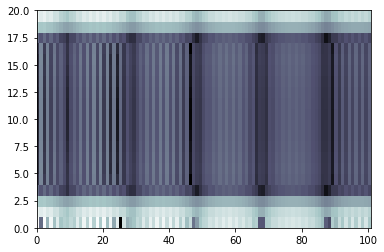

In [145]:
plt.pcolormesh(sgram, cmap="bone")

In [60]:
def kmeans(train,nclust):
    lentrain=len(train)
    centers=[train[(i*lentrain)//nclust] for i in range(nclust)]
    centers[0]=train[200]#first educated  guess
    centers[1]=train[400]
    centers[2]=train[590]
    classes=-1*np.ones(lentrain)
    for j in range(1000):#loop
        #########find nearest center
        for k in range(lentrain):
            frame=train[k]
            mindist=np.inf
            for l in range(nclust):
                dist=np.dot((frame-centers[l]),(frame-centers[l]))
                if dist<mindist:
                    mindist=dist
                    classes[k]=l
        ##########redefine centers
        for l in range(nclust):
            centers[l]=np.mean(np.array([train[i] for i in range(lentrain) if classes[i]==l]),axis=0)
            
    return (classes)

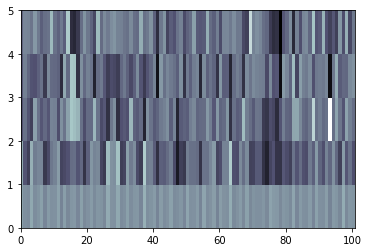

In [104]:
plt.pcolormesh(np.dot(W,sgram), cmap="bone")#weights, you can see the different sounds pretty clearly. neat

In [66]:
Wsgram.shape

(101, 8)

In [32]:
from numpy.linalg import inv
from numpy.linalg import det
def GMM4(train,nclusters,classes):
    #priors=np.array([sum(np.asarray(classes)==l) for l in range(nclusters)])
    #priors=priors/sum(priors)
    priors=np.zeros(nclusters)
    priors=np.ones(nclusters)/nclusters
    
    
    
    dims=train.shape[1]
    lentrain=train.shape[0]
    mus=np.zeros((nclusters,dims))
    N=np.zeros(nclusters)
    covv=np.zeros((nclusters,dims,dims))
    #covv=list(range(nclusters))
    for l in range(nclusters):
        covv[l,:,:]=np.eye(dims)
        #mus[l,:]=train[l*lentrain//nclusters,:]
    mus[0,:]=train[20,:]
    mus[1,:]=train[40,:]
    mus[2,:]=train[59,:]
    gamma=np.zeros((lentrain,nclusters))
    #for k in range(lentrain):
        #for l in range(nclusters):
            #gamma[k,l]=1*(classes[k]==l)
            #gamma[k,l]=0.33333333
    for j in range(500):
        for k in range(lentrain):
            for l in range(nclusters):
                #calculate posteriors
                gamma[k,l]=priors[l]*(det(covv[l,:,:]))**(-0.5)*np.exp(-0.5*(np.dot((train[k,:]-mus[l,:]).T,np.dot(inv(covv[l,:,:]),train[k,:]-mus[l,:])) ))
            gamma[k,:]=gamma[k,:]/sum(gamma[k,:])#normalize

        for l in range(nclusters):
            N[l]=sum(gamma[:,l])#expected number
            priors[l]=N[l]/lentrain#update priors
            for d in range(dims):#update centers
                mus[l,d]=np.dot(gamma[:,l],train[:,d])/N[l]
            for d in range(dims):#update spreads
                #for e in range(dims):
                #    covv[l,d,e]=sum([gamma[i,l]*(train[i,d]-mus[l,d])*(train[i,e]-mus[l,e]) for i in range(lentrain)])/np.sum(gamma[:,l])#np.dot(np.multiply(posteriors[:,l],(train-centers[:,l]).T),train-centers[:,l])/N[l]
                covv[l,d,d]=sum([gamma[i,l]*(train[i,d]-mus[l,d])*(train[i,d]-mus[l,d]) for i in range(lentrain)])/np.sum(gamma[:,l])#np.dot(np.multiply(posteriors[:,l],(train-centers[:,l]).T),train-centers[:,l])/N[l]
        #print((det(covv[1,:,:]))**(-0.5)*np.exp(-0.5*(np.dot((train[0,:]-mus[1,:]).T,np.dot(covv[1,:,:],train[0,:]-mus[1,:])) )))
        #print(mus[1,:])
    return (gamma,mus,covv)

In [105]:
transin=np.ones((3,3))/3
musin=np.zeros((3,5))

covvin=np.zeros((3,5,5))
for i in range(3):
    musin[i,:]=Wsgram[i*20,:]
    covvin[i,:,:]=np.eye(5)

In [20]:
window=np.hamming(20)
sgram=np.log(specto(A[1:,8000],window,.5))

In [21]:
W=pca(sgram,5)#pca first

In [10]:
Wsgram=np.dot(W,sgram).T

In [11]:
gamma,musin,covvin=GMM4(Wsgram,3,[])

In [12]:
covvin

array([[[0.03257071, 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.24473527, 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.5207449 , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.03554554, 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.21600488]],

       [[0.16120163, 0.        , 0.        , 0.        , 0.        ],
        [0.        , 2.29042017, 0.        , 0.        , 0.        ],
        [0.        , 0.        , 4.09635295, 0.        , 0.        ],
        [0.        , 0.        , 0.        , 2.49642275, 0.        ],
        [0.        , 0.        , 0.        , 0.        , 3.00421365]],

       [[0.01980174, 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.25566363, 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.04456194, 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.50849793, 0.        ],
        [0.     

In [13]:
priorsin=np.zeros(3)
for i in range(3):
    priorsin[i]=sum(np.argmax(gamma, axis=1)==i)/101##priors

In [15]:
transin=np.zeros((3,3))
for i in range(100):
    transin[int(np.argmax(gamma, axis=1)[i]),int(np.argmax(gamma, axis=1)[i+1])]+=1
for i in range(3):
    transin[i,:]=transin[i,:]/sum(transin[i,:])

In [16]:
[musout,covvout,transout,priorsout]=HMM2(Wsgram,3,transin,musin,covvin,priorsin)

[0.27722772 0.16831683 0.55445545]
5
[[[0.03257071 0.         0.         0.         0.        ]
  [0.         0.24473527 0.         0.         0.        ]
  [0.         0.         0.5207449  0.         0.        ]
  [0.         0.         0.         0.03554554 0.        ]
  [0.         0.         0.         0.         0.21600488]]

 [[0.16120163 0.         0.         0.         0.        ]
  [0.         2.29042017 0.         0.         0.        ]
  [0.         0.         4.09635295 0.         0.        ]
  [0.         0.         0.         2.49642275 0.        ]
  [0.         0.         0.         0.         3.00421365]]

 [[0.01980174 0.         0.         0.         0.        ]
  [0.         0.25566363 0.         0.         0.        ]
  [0.         0.         0.04456194 0.         0.        ]
  [0.         0.         0.         0.50849793 0.        ]
  [0.         0.         0.         0.         0.39929368]]]
[[ 1.21369096 -0.71137227 -0.42602409 -0.0554187   0.22106515]
 [ 0.9103

In [17]:
transout

array([[9.38956682e-01, 7.18432061e-35, 6.10433182e-02],
       [1.00000000e+00, 1.28644849e-79, 1.57471852e-35],
       [5.81407577e-01, 4.18592423e-01, 3.16370232e-39]])

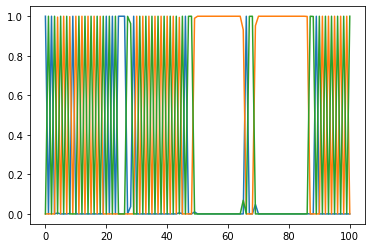

In [171]:
plt.plot(gamma)

In [150]:
priorsin

array([0.11881188, 0.55445545, 0.32673267])

In [182]:
transin

array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

In [153]:
covvin

array([[[ 1.28281019e-01,  1.65754542e-01, -1.26522658e-01,
          1.02651102e+00,  6.75755848e-01],
        [ 1.65754542e-01,  3.00489984e-01,  7.98568728e-02,
          9.44410170e-01,  5.60193376e-01],
        [-1.26522658e-01,  7.98568728e-02,  1.34255554e+00,
         -2.03734238e+00, -2.07133663e+00],
        [ 1.02651102e+00,  9.44410170e-01, -2.03734238e+00,
          1.06071838e+01,  7.47012112e+00],
        [ 6.75755848e-01,  5.60193376e-01, -2.07133663e+00,
          7.47012112e+00,  6.00238461e+00]],

       [[ 1.87053582e-02,  3.25475057e-02,  4.25501648e-02,
          5.16501678e-02, -2.71990950e-02],
        [ 3.25475057e-02,  6.01908686e-02,  8.17687319e-02,
          9.55017297e-02, -2.69912276e-02],
        [ 4.25501648e-02,  8.17687319e-02,  1.14872588e-01,
          1.30045845e-01, -1.80557614e-02],
        [ 5.16501678e-02,  9.55017297e-02,  1.30045845e-01,
          1.59014597e-01, -3.20956589e-02],
        [-2.71990950e-02, -2.69912276e-02, -1.80557614e-02,
  

In [61]:
##How I would test the data, if I had data to test. 
def HMMtest(mumat,priormat,covvmat,transmat,train,digitnum,trainnum,nclusters):
    logprobs=np.zeros((digitnum,1))#
    dims=train.shape[1]
    lentrain=train.shape[0]
    alpha=np.zeros((lentrain,nclusters))
    for i in range(digitnum):#for each digit
        if 1:#for i in range(trainnum):#for each training data from that digit
            #train=testmat[i]#take the HMM output
            mus=mumat[i]
            priors=priormat[i]
            covv=covvmat[i]
            trans=transmat[i]
            c=np.zeros(lentrain)
            #run the forward pass
            for l in range(nclusters):
                alpha[0,l]=priors[l]*(6.28318530718)**(-0.5*dims)*det(covv[l,:,:])**(-0.5)*np.exp(-0.5*(np.dot((train[0,:]-mus[l,:]).T,np.dot(inv(covv[l,:,:]),train[0,:]-mus[l,:]))))
            c[0]=1/np.sum(alpha[0,:])
            for l in range(nclusters):
                alpha[0,l]=alpha[0,l]*c[0]
            for k in range(lentrain-1):
                for l in range(nclusters):
                    alpha[k+1,l]=(6.28318530718)**(-0.5*dims)*det(covv[l,:,:])**(-0.5)*np.exp(-0.5*(np.dot((train[k+1,:]-mus[l,:]).T,np.dot(inv(covv[l,:,:]),train[k+1,:]-mus[l,:]))))*np.dot(alpha[k,:],trans[:,l])
                c[k+1]=1/np.sum(alpha[k+1,:])
                for l in range(nclusters):
                    alpha[k+1,l]=alpha[k+1,l]*c[k+1]
            #the path integral value is normally just the last alpha but we multipled by c[k] at each k so we need to
            #divide by prod(c[k] for all k), which is done in log space for ease's sake
            
            logprobs[i,0]=-np.sum(np.log(c))#np.log(alpha[lentrain-1])
    #take the mean of training data in each digit, then find the max. I don't know if this is a good metric or not.
    return np.argmin(logprobs)

In [34]:
mumat=[]
priormat=[]
covvmat=[]
transmat=[]
Wsgrams=[]
window=np.hamming(20)
sgramLE=np.log(specto(A[1:,2000],window,.5))
sgramHE=np.log(specto(A[1:,8000],window,.5))
W=pca(np.concatenate((sgramLE,sgramHE),axis=1),5)
Wsgrams.append(np.dot(W,sgramLE).T)
Wsgrams.append(np.dot(W,sgramHE).T)
for i in range(2):
    gamma,musin,covvin=GMM4(Wsgrams[i],3,[])
    priorsin=np.zeros(3)
    for i in range(3):
        priorsin[i]=sum(np.argmax(gamma, axis=1)==i)/101##priors
    transin=np.zeros((3,3))
    for i in range(100):
        transin[int(np.argmax(gamma, axis=1)[i]),int(np.argmax(gamma, axis=1)[i+1])]+=1
    for i in range(3):
        transin[i,:]=transin[i,:]/sum(transin[i,:])
    print(musin)
    [musout,covvout,transout,priorsout]=HMM2(Wsgram,3,transin,musin,covvin,priorsin)
    mumat.append(musout)
    covvmat.append(covvout)
    transmat.append(transout)
    priormat.append(priorsout)


[[ 1.34135952  0.16923813 -0.18669059 -0.12772404  1.09218186]
 [ 0.76025131 -1.36022651  0.61507005  0.15110725  0.02932155]
 [ 0.96889571 -0.47449673 -0.54300639  0.20079469 -0.00719666]]
[[ 1.30040647  1.46092789  0.15278968 -0.56242735  0.51390175]
 [ 0.88885637  0.1063986   1.51254109 -0.50906582 -0.52112087]
 [ 0.89332395 -0.00213708 -0.25459353 -0.00831284 -0.69085649]]


In [195]:
musin

array([[ 0.88092776,  0.64426156, -0.05602588, -0.5920239 , -0.69805963],
       [ 1.17235922,  0.80369773, -0.08344224,  0.27664366,  0.34710441],
       [ 0.7167317 , -0.43916117, -0.65718856, -1.46022945, -0.46417318]])

In [194]:
gamma,musin,covvin=GMM4(Wsgrams[1],3,[])

In [35]:
transmat

[array([[8.94690109e-01, 1.05309891e-01, 0.00000000e+00],
        [3.97881516e-06, 5.03672438e-01, 4.96323583e-01],
        [1.00000000e+00, 2.94911584e-39, 3.83776671e-46]]),
 array([[0.00000000e+00, 1.00000000e+00, 2.54582465e-31],
        [4.85736614e-11, 9.31234200e-01, 6.87657995e-02],
        [3.62107393e-02, 9.63789259e-01, 1.98703178e-09]])]

In [53]:
window=np.hamming(20)
sgram=np.log(specto(A[1:,4000],window,.5))
Wsgram=np.dot(W,sgram).T
HMMtest(mumat,priormat,covvmat,transmat,Wsgram,2,1,3)

1

In [69]:
hmmclasses=[]
for i in range(10000):
    window=np.hamming(20)
    sgram=np.log(specto(B[1:,i],window,.5))
    Wsgram=np.dot(W,sgram).T
    x=HMMtest(mumat,priormat,covvmat,transmat,Wsgram,2,1,3)
    hmmclasses.append(x)

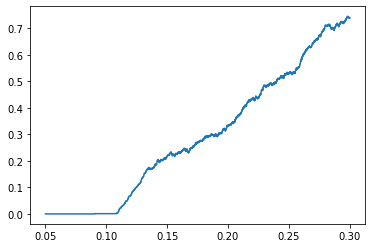

In [70]:
plt.plot(A[0,:],np.convolve(hmmclasses,np.ones(1000)*.001)[:10000])

In [59]:
hmmclasses=[]
for i in range(10000):
    window=np.hamming(20)
    sgram=np.log(specto(B[1:,i],window,.5))
    Wsgram=np.dot(W,sgram).T
    x=HMMtest(mumat,priormat,covvmat,transmat,Wsgram,2,1,3)
    hmmclasses.append(x)